# CVL100C: Assignment - 2

Anirudha Kulkarni

2019CS50421

### Objectives:

- Using hourly concentrations, show hourly, monthly and seasonal trends of PM2.5 and PM10 measured at Anand Vihar CPCB station.
- Interpretate the trends

### Details:

- Period: 1st January -31st December 2019
- Pollutants: PM2.5, PM10, SO2 and NO2
- Station : Anand Vihar
- CPCB data Source: https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqmlanding/data
- Seasons: Winter (December to February), Pre-monsoon (March to May), Monsoon (June to August) and Post-monsoon (September to November)

---

## Approach:

Data is analysed in few steps.

Program is written in python. Modules like `pandas` , `numpy` are used for data handeling and `matplotlib` for data visualisation.

### 1. Import database:

Database is loaded from csv file and cleared from `None` values by dropping them as they are few in number. Appropriate headings for the columns are added and data type of each cell is adjusted to make handeling data easier.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import datetime

df = pd.read_excel (r'./A2_G4.xlsx')
df=df.iloc[16:, 0:4]
df.drop(df.columns[1],axis=1,inplace=True)
df=df.mask(df.eq('None')).dropna()
df.columns=['Date','PM2.5','PM10']
df['Date']=pd.to_datetime(df['Date'])
df.reset_index(drop=True, inplace=True)
df=df.astype({'PM2.5':float,'PM10':float})
df

Date   PM2.5    PM10
0    2019-01-01 00:00:00  517.25  950.00
1    2019-01-01 01:00:00  531.25  939.00
2    2019-01-01 02:00:00  542.00  797.25
3    2019-01-01 03:00:00  547.50  526.25
4    2019-01-01 04:00:00  497.00  776.25
...                  ...     ...     ...
8095 2019-12-31 17:00:00  186.00  274.00
8096 2019-12-31 18:00:00  234.50  371.75
8097 2019-12-31 19:00:00  416.50  704.50
8098 2019-12-31 20:00:00  549.50  847.25
8099 2019-12-31 21:00:00  657.25  920.00

[8100 rows x 3 columns]


### 2. Plotting graphs:

Following graphs are plotted to get easier visualization of data

1. Hourly distribution
2. Monthly distribution
3. Seasonal distribution

#### 2.1. Hourly Trends:
#### Calculations:
Hourly trends are calculated by taking all year average corresponding to each hour of a day. Total 365 values corresponding to each hour are taken and averaged to get corresponding hour average


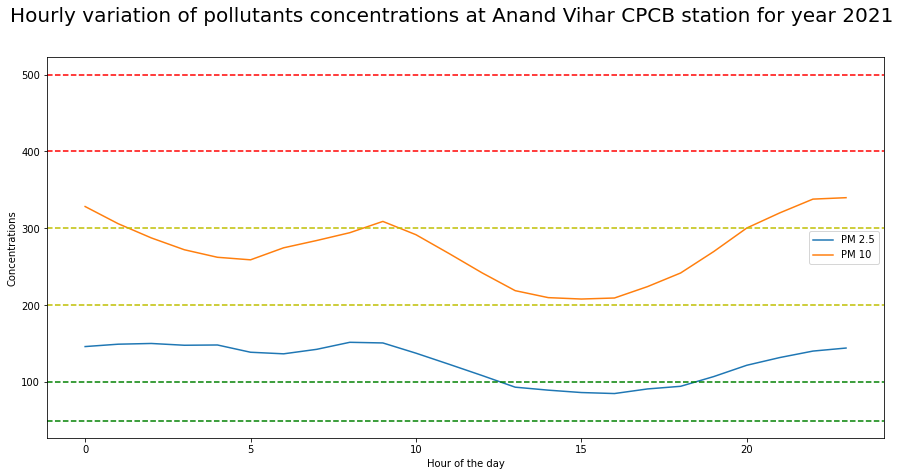

In [2]:
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(7) 
result = df.groupby([ df['Date'].dt.hour]).agg(np.mean)
plt.plot(result['PM2.5'],label='PM 2.5')
plt.plot(result['PM10'],label='PM 10')
plt.xlabel('Hour of the day')
plt.ylabel('Concentrations')
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=200, color='y', linestyle='--')
plt.axhline(y=300, color='y', linestyle='--')
plt.axhline(y=400, color='r', linestyle='--')
plt.axhline(y=500, color='r', linestyle='--')
f.suptitle('Hourly variation of pollutants concentrations at Anand Vihar CPCB station for year 2021', fontsize=20)
plt.legend()
plt.show()

### 2.2. Monthly Trends:
#### Approach:
Monthly trends are calculated by taking all year average corresponding to each day and then grouping it to corresponding month to take month wide average. 

**Formula:**

`Monthly Average = Sum of all values in a month / Days in current month`


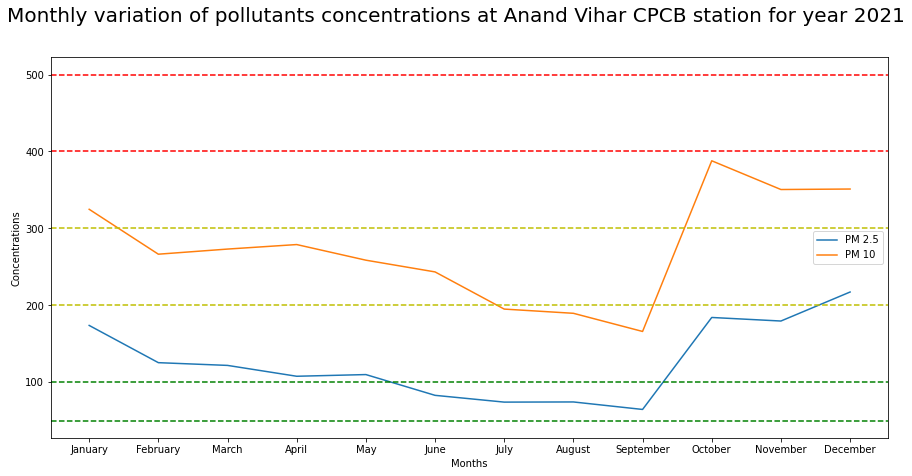

In [3]:
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(7) 
result = df.groupby([ df['Date'].dt.month]).agg(np.mean)
result['Month']=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.plot(result['Month'],result['PM2.5'],label='PM 2.5')
plt.plot(result['Month'],result['PM10'],label='PM 10')
plt.xlabel('Months')
plt.ylabel('Concentrations')
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=200, color='y', linestyle='--')
plt.axhline(y=300, color='y', linestyle='--')
plt.axhline(y=400, color='r', linestyle='--')
plt.axhline(y=500, color='r', linestyle='--')
plt.legend()
f.suptitle('Monthly variation of pollutants concentrations at Anand Vihar CPCB station for year 2021', fontsize=20)
plt.show()

## 3. Season wise trends:
The season wise trend is calculated by taking average of concentration in days in the season. Seasons are taken as Winter (December to February), Pre-monsoon (March to May), Monsoon (June to August) and Post-monsoon (September to November).


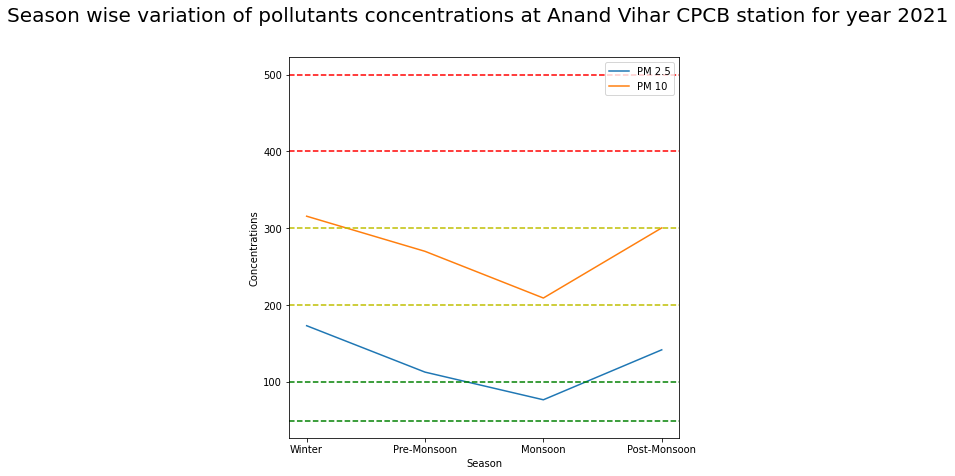

In [4]:
df['season'] = (df['Date'].dt.month%12 + 3)//3
seasons = {1: 'Winter',2: 'Pre-Monsoon',3: 'Monsoon',4: 'Post-Monsoon'}
df['season_name'] = df['season'].map(seasons)
f = plt.figure() 
f.set_figwidth(7) 
f.set_figheight(7) 
result = df.groupby([ df['season_name']]).agg(np.mean).sort_values('season')
plt.plot(result['PM2.5'],label='PM 2.5')
plt.plot(result['PM10'],label='PM 10')
plt.xlabel('Season')
plt.ylabel('Concentrations')
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=200, color='y', linestyle='--')
plt.axhline(y=300, color='y', linestyle='--')
plt.axhline(y=400, color='r', linestyle='--')
plt.axhline(y=500, color='r', linestyle='--')
plt.legend()
f.suptitle('Season wise variation of pollutants concentrations at Anand Vihar CPCB station for year 2021', fontsize=20)
plt.show()

## Some Other interesting Trends:
### 1. Day of the week trends:
Taking average over days of a week we can calculate weekly trends as follows.


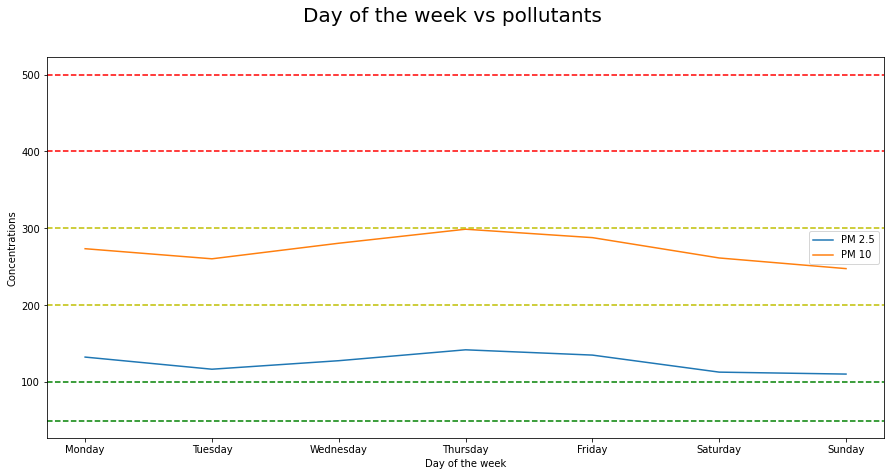

In [5]:
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(7) 
result = df.groupby([ df['Date'].dt.dayofweek]).agg(np.mean)
result['Day']=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.plot(result['Day'],result['PM2.5'],label='PM 2.5')
plt.plot(result['PM10'],label='PM 10')
plt.xlabel('Day of the week')
plt.ylabel('Concentrations')
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=200, color='y', linestyle='--')
plt.axhline(y=300, color='y', linestyle='--')
plt.axhline(y=400, color='r', linestyle='--')
plt.axhline(y=500, color='r', linestyle='--')
f.suptitle('Day of the week vs pollutants', fontsize=20)
plt.legend()
plt.show()

### 2. Day of the Month trends:
Taking average of days of a Month over the year, we can calculate weekly trends as follows.

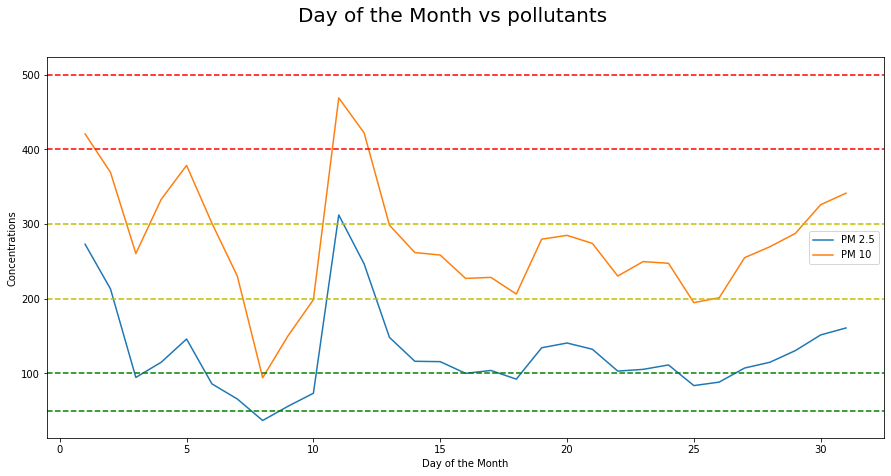

In [6]:
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(7) 
result = df.groupby([ df['Date'].dt.day]).agg(np.mean)
plt.plot(result['PM2.5'],label='PM 2.5')
plt.plot(result['PM10'],label='PM 10')
plt.xlabel('Day of the Month')
plt.ylabel('Concentrations')
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=100, color='g', linestyle='--')
plt.axhline(y=200, color='y', linestyle='--')
plt.axhline(y=300, color='y', linestyle='--')
plt.axhline(y=400, color='r', linestyle='--')
plt.axhline(y=500, color='r', linestyle='--')
plt.legend()
f.suptitle('Day of the Month vs pollutants', fontsize=20)
plt.show()

## Conclusions:

Both PM2.5 and PM10 follows similar graphs in almost all situations. Most of the sources of such particles emmits both and hence both of them follows more or less similar trends.
1. Hourly trends:

Pollute concentration starts building up from 6 AM in the morning and rises steadily till 11 AM which is travel time for most of the people and traffic is highest during this time. Then it dips till 4 pm to reach its lowest. As time for closing of working hours start the concentration starts building up and reaches its highest value till midnight and then falls again. 2-4 is the point with lowest of all concentrations. 
As noted above both of them follows similar trend with PM10 having higher value than PM2.5


2. Monthly trends:

Pollute Concentration decreases steadily till November. And then there is sudden increase in October month. This can be attributed to following reasons:
    
    2.1 Farm fires in Punjab and Hariyana - burning of stubbles
    2.2 Fire crackers burning in Diwali festival
    2.3 Starting of winter - lower temperatures increases use of fuels

The increase in concentration further increases in month of November, December and January too due to same reasons effect of monsoon winds.

3. Seasonal trends:

Concentrations drops till monsoon season and then starts building till winters which reduces only after next pre-monsoon season. 
The season of winter also matches with farm fires season which causes increase in concentrations in winters.
Increase in wind speed would cause PM10 to dilute by dispersion and hence decrease its concentrations in the atmosphere. Such effects are more prominent in pre monsoon season. Also rain reduces the particle concentrations for time being.
PM10 concentrations increases at larger rate than PM2.5 in winters.

4. Day of a Week trend:

Weekends tend to have slightly less AQI compared to Weekdays. This can be attributed to reduction in vehicle traffic in the area as Anand vihar resides in South Delhi area and major pollution source is vehichle exhaust. Also reduction in factory hours on weekends also agrees with the trend.
There is slight upserge towards the mid-week. This can be attributed to building up of pollutants as week starts and so people start using vehicles and factories operate

5. Day of Month:

During the first weekend of a month we see a sudden drop and then sudden increase in concentrations. This then becomes stable over the month.

### References:
1. https://iopscience.iop.org/article/10.1088/1755-1315/18/1/012100/pdf
2. https://www.downtoearth.org.in/news/air/-what-other-option-do-we-have-why-stubblefires-would-not-die-74174
3. https://www.downtoearth.org.in/news/air/air-quality-in-delhi-further-deteriorates-postdiwali-breaches-emergency-mark-for-a-time-74243
4. https://time.com/5718012/new-delhi-pollution-2019/